In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

import pandas as pd

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

# **Dataset: Car Clasification**

Está relacionado con las caracteristicas de diferentes vehículos, sus detalles técnicos y especificacion.

### **Variables de entrada**
1. **Year:** Año del modelo del vehiculo
2. **Make:** Marca del vehículo (por ejemplo, Ford, BMW, etc.).
3. **Model**: Modelo del vehículo (por ejemplo, Mustang, X5, etc.).
4. **Engine Fuel Type**: Tipo de combustible del motor (por ejemplo, "regular unleaded", "premium unleaded (required)", etc.).
5. **Engine HP**: Potencia del motor en caballos de fuerza
6. **Engine Cylinders**: Número de cilindros del motor.
7. **Transmission Type**: Tipo de transmisión del vehículo (por ejemplo, "MANUAL", "AUTOMATIC", etc.).
8. **Driven_Wheels**: Tipo de tracción del vehículo (por ejemplo, "front wheel drive", "rear wheel drive").
9. **Number of Doors**: Número de puertas del vehículo.
10. **Market Category**: Categoría de mercado a la que pertenece el vehículo (por ejemplo, "Luxury", "Performance", etc.).
11. **Vehicle Size**: Tamaño del vehículo (por ejemplo, "Compact", "Midsize", "Large").
12. **Vehicle Style**: Estilo del vehículo (por ejemplo, "Sedan", "Coupe", etc.).
13. **highway MPG**: Millas por galón en carretera (rendimiento de combustible en autopistas).
14. **city mpg**: Millas por galón en ciudad (rendimiento de combustible en ciudad).
15. **Popularity**: Popularidad del modelo, una métrica que podría estar basada en las ventas o menciones.
16. **MSRP**: Precio de venta sugerido por el fabricante (Manufacturer's Suggested Retail Price).

* **Variables Numéricas**:
  Year, Engine HP, Engine Cylinders, Number of Doors, highway MPG, city mpg, Popularity, MSRP.
* **Variables Categoricas**:
  Make, Model, Engine Fuel Type, Transmission Type, Driven_Wheels, Market Category, Vehicle Size, Vehicle Style.

**Variable de Salida**: Vehicle Size (tamaño del vehículo)

In [106]:
dataframe = pd.read_excel('/content/drive/MyDrive/AI/Dataset/Car Scale.xlsx')
print('Dimensiones:', dataframe.shape)
dataframe.sample(n=200)

Dimensiones: (11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
6843,Lincoln,MKC,2015,regular unleaded,240.0,4.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Luxury",Compact,4dr SUV,26,19,61,35595
3784,Mitsubishi,Eclipse,2011,regular unleaded,162.0,4.0,MANUAL,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,28,20,436,18999
11842,GMC,Yukon Hybrid,2013,regular unleaded,332.0,8.0,AUTOMATIC,four wheel drive,4.0,"Luxury,Hybrid",Large,4dr SUV,23,20,549,64805
7725,Mazda,Protege,2001,regular unleaded,130.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,28,22,586,13885
1636,Chevrolet,Aveo,2009,regular unleaded,107.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,34,27,1385,14100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6414,Acura,Legend,1993,regular unleaded,200.0,6.0,MANUAL,front wheel drive,4.0,Luxury,Midsize,Sedan,23,15,204,2000
4848,Subaru,Forester,2016,regular unleaded,170.0,4.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,32,24,640,25795
10718,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Midsize,Passenger Van,19,14,5657,33175
3752,Ford,E-Series Wagon,2014,flex-fuel (unleaded/E85),255.0,8.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Midsize,Passenger Van,15,11,5657,36020


Esta línea usa el método ``.unique()`` de pandas para extraer todos los valores únicos de la columna 'Vehicle Size'.
Almacena estos valores en la variable SizeCar_Var. Almacena estos valores en la variable SizeCar_Var.

Luego imprime los valores unicos de la columna con el tamanio de la lista

In [107]:
SizeCar_Var = dataframe['Vehicle Size'].unique() #Obtenemos todos los valores unicos de la columna 'SizeCar'

#Mostramos la lista de valores unicos y la cantidad de estos
print(SizeCar_Var)
print(len(SizeCar_Var))

['Compact' 'Midsize' 'Large']
3


**1.      Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.**

Aqui estoy creando nueva columnas en el dataset basandome en las caracteristicas existentes de los vehiculos.

1. Columna 'IsLuxuryBrand' Para cada fila, se verifica si el valor de la columna 'Make' (marca del automóvil) está en la lista de marcas de lujo. Si es así, la columna 'IsLuxuryBrand' recibe un valor True; en caso contrario, False.

2. Creo otra columna 'IsConvertible' que indica si un automóvil es convertible. Si lo contiene, la nueva columna 'IsConvertible' se establece en True, de lo contrario en False.

3. Columna 'FuelEfficiencyCategory' que categoriza los vehículos en 'High', 'Medium', o 'Low' en función del consumo de combustible en carretera (highway MPG).
  * Si el valor de 'highway MPG' es mayor o igual a 30, se clasifica como 'High'.
  * Si es mayor o igual a 20 pero menor de 30, se clasifica como 'Medium'.
  * Si es menor de 20, se clasifica como 'Low'.

4. Columna 'MarketCategoryCount' Esta columna cuenta el número de categorías de mercado asociadas a cada vehículo.
Si la columna 'Market Category' no es nula (pd.notnull(x)), el código divide la cadena en cada coma y cuenta cuántos elementos hay.
Si la columna es nula, establece el valor en 0.

In [108]:
# Crear una columna 'IsLuxuryBrand' que indique si el automóvil pertenece a una marca de lujo (booleano)
luxury_brands = ['BMW', 'Audi', 'Mercedes-Benz', 'Lexus', 'Jaguar', 'Porsche']
dataframe['IsLuxuryBrand'] = dataframe['Make'].apply(lambda x: x in luxury_brands)

# Crear una columna 'IsConvertible' que indique si el automóvil es convertible (booleano)
dataframe['IsConvertible'] = dataframe['Vehicle Style'].apply(lambda x: 'Convertible' in x)

# Crear una columna 'FuelEfficiencyCategory' que categorice los vehículos en 'High', 'Medium', 'Low' según el MPG en carretera
dataframe['FuelEfficiencyCategory'] = np.where(dataframe['highway MPG'] >= 30, 'High',
                                            np.where(dataframe['highway MPG'] >= 20, 'Medium', 'Low'))

# Crear una columna 'MarketCategoryCount' que cuente el número de categorías de mercado asociadas a cada vehículo
dataframe['MarketCategoryCount'] = dataframe['Market Category'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

# Mostrar las primeras filas del dataset actualizado para verificar los nuevos atributos
dataframe.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,IsLuxuryBrand,IsConvertible,FuelEfficiencyCategory,MarketCategoryCount
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,True,False,Medium,3
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,True,True,Medium,2
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,True,False,Medium,2
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,True,False,Medium,2
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,True,True,Medium,1


**2.      Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.**

La función duplicar_filas_con_criterios(df) crea una copia del dataset original y modifica los valores según los criterios definidos. Luego, combina las filas modificadas con el dataset original.


In [109]:
def duplicar_filas_con_criterios(df):
    # Crear una copia del dataset original para duplicar filas
    df_duplicated = df.copy()

    # Aplicar criterios específicos para modificar los valores duplicados

    # Year: Incrementar en 1 si el año es menor a 2020
    df_duplicated.loc[df_duplicated['Year'] < 2020, 'Year'] += 1

    # Engine Fuel Type: Cambiar de 'premium unleaded (required)' a 'premium unleaded (recommended)'
    df_duplicated.loc[df_duplicated['Engine Fuel Type'] == 'premium unleaded (required)', 'Engine Fuel Type'] = 'premium unleaded (recommended)'

    # Engine HP: Incrementar en 5% si el valor es menor a 200
    df_duplicated.loc[df_duplicated['Engine HP'] < 200, 'Engine HP'] *= 1.05

    # Transmission Type: Cambiar de 'MANUAL' a 'AUTOMATIC'
    df_duplicated.loc[df_duplicated['Transmission Type'] == 'MANUAL', 'Transmission Type'] = 'AUTOMATIC'

    # Driven_Wheels: Cambiar de 'rear wheel drive' a 'front wheel drive'
    df_duplicated.loc[df_duplicated['Driven_Wheels'] == 'rear wheel drive', 'Driven_Wheels'] = 'front wheel drive'

    # Number of Doors: Cambiar de 2 a 4
    df_duplicated.loc[df_duplicated['Number of Doors'] == 2, 'Number of Doors'] = 4

    # Market Category: Añadir 'Economy' si no es de lujo
    df_duplicated.loc[df_duplicated['IsLuxuryBrand'] == False, 'Market Category'] = df_duplicated['Market Category'] + ',Economy'

    # **No cambiar 'Vehicle Size' ya que es la nueva etiqueta de clase**

    # Vehicle Style: Cambiar de 'Coupe' a 'Sedan'
    df_duplicated.loc[df_duplicated['Vehicle Style'] == 'Coupe', 'Vehicle Style'] = 'Sedan'

    # highway MPG: Incrementar en 2 si el valor es menor a 30
    df_duplicated.loc[df_duplicated['highway MPG'] < 30, 'highway MPG'] += 2

    # city mpg: Incrementar en 1 si el valor es menor a 20
    df_duplicated.loc[df_duplicated['city mpg'] < 20, 'city mpg'] += 1

    # Popularity: Incrementar en 100 si el valor es menor a 3000
    df_duplicated.loc[df_duplicated['Popularity'] < 3000, 'Popularity'] += 100

    # Convertir la columna 'MSRP' a tipo float antes de realizar la multiplicación
    df_duplicated['MSRP'] = df_duplicated['MSRP'].astype(float)

    # Incrementar en 10% si el año es antes de 2015
    df_duplicated.loc[df_duplicated['Year'] < 2015, 'MSRP'] *= 1.10

    # FuelEfficiencyCategory: Cambiar a 'High' si es una marca de lujo
    df_duplicated.loc[df_duplicated['IsLuxuryBrand'] == True, 'FuelEfficiencyCategory'] = 'High'

    # MarketCategoryCount: Incrementar en 1 si es menor a 2
    df_duplicated.loc[df_duplicated['MarketCategoryCount'] < 2, 'MarketCategoryCount'] += 1

    # Añadir las filas duplicadas al dataset original
    df_combined = pd.concat([df, df_duplicated], ignore_index=True)

    return df_combined

# Aplicar la función para duplicar filas con los criterios establecidos
dataframe_combined = duplicar_filas_con_criterios(dataframe)

# Verificar la duplicación
print(dataframe_combined.head())
print("\nNúmero total de filas después de la duplicación:", dataframe_combined.shape[0])


  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

## **Normalizar las caracteristicas**

Hay que convertir todos los valores a una misma escala.

**1.** Primero se define la funcion `featureNormalize`, donde toma como argumento `X` que es un array Numpy.

**2.** Se crea una copia de los datos de `X` para evitar modificar los datos originales, esta copia se utilizara para almacenar los datos normalizados.

**3.** Se inicializa `mu` y `sigma` que son arrays que se inicializan en cero, y tendran un tamanio igual al de las caracteristicas X.

* `mu` almacenara la media de cada caracteristicas

* `sigma` almacenara la desviacion estandar de cada caracteristica

**4.** Calcular la Media y la desviacion estandar.
* `np.mean(X, axis = 0)` calcula la media de cada caracteristica (columna) a lo largo de todas las muestras (filas)
* `np.std(X, axis = 0)` calcula la desviacion estandar de cada caracteristica que se almacena en `sigma`
* La normalizacion se basa en restar la media y dividir por la desviacion estandar para cada caracteristica.

**5.** Se aplica la normalizacion:
`X_norm = (X - mu) / sigma`
* Se resta la media de cada característica (X - mu) para centrar los datos en 0.
* Luego, se divide por la desviación estándar (/ sigma) para escalar las características. Esto asegura que los valores estén en una escala comparable, generalmente entre -1 y 1.

**6.** Por ultimo se devuelven los resultados. `X_norm` son datos normalizados, `mu` la media de cada caracteristica y `sigma` la desviacion estandar de cada caracteristica.

In [110]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Realizo un mapeo manual de todas las columnas de tipo string a valores numericos unicos en el dataset.
1. Creo una copia del dataframe
2. Itero sobre todas las columnas de tipo string
3. Obtengo los valores unicos de la columna
4. Creo un diccioneario de mapeo para la columna donde cada valor único de la columna se asigna a un número único. Esto se hace mediante la función enumerate, que asigna un índice a cada valor empezando desde 1.
5. Aplico el mapeo a la columna, se reemplazan los valores de la columna original con sus equivalentes numéricos. El resultado se guarda en una nueva columna que lleva el nombre de la columna original seguido por '_ordinal'.
6. Elimino la columna original
7. Se muestra el mapeo para la referencia

In [111]:
# Crear una copia del dataframe para no modificar los datos originales
df_mapped = dataframe_combined.copy()

# Iterar sobre todas las columnas de tipo string y mapear manualmente los valores únicos a números
for column in df_mapped.select_dtypes(include=['object']).columns:
    # Obtener los valores únicos de la columna
    unique_values = df_mapped[column].unique()

    # Crear un diccionario de mapeo para la columna actual
    column_map = {value: index for index, value in enumerate(unique_values, start=1)}

    # Aplicar el mapeo a la columna
    df_mapped[column + '_ordinal'] = df_mapped[column].map(column_map)

    # Eliminar la columna original
    df_mapped.drop(column, axis=1, inplace=True)

    # Mostrar el mapeo para referencia
    print(f"Mapeo para la columna '{column}': {column_map}")

# Verificar la transformación del dataset
df_mapped.head()


Mapeo para la columna 'Make': {'BMW': 1, 'Audi': 2, 'FIAT': 3, 'Mercedes-Benz': 4, 'Chrysler': 5, 'Nissan': 6, 'Volvo': 7, 'Mazda': 8, 'Mitsubishi': 9, 'Ferrari': 10, 'Alfa Romeo': 11, 'Toyota': 12, 'McLaren': 13, 'Maybach': 14, 'Pontiac': 15, 'Porsche': 16, 'Saab': 17, 'GMC': 18, 'Hyundai': 19, 'Plymouth': 20, 'Honda': 21, 'Oldsmobile': 22, 'Suzuki': 23, 'Ford': 24, 'Cadillac': 25, 'Kia': 26, 'Bentley': 27, 'Chevrolet': 28, 'Dodge': 29, 'Lamborghini': 30, 'Lincoln': 31, 'Subaru': 32, 'Volkswagen': 33, 'Spyker': 34, 'Buick': 35, 'Acura': 36, 'Rolls-Royce': 37, 'Maserati': 38, 'Lexus': 39, 'Aston Martin': 40, 'Land Rover': 41, 'Lotus': 42, 'Infiniti': 43, 'Scion': 44, 'Genesis': 45, 'HUMMER': 46, 'Tesla': 47, 'Bugatti': 48}
Mapeo para la columna 'Model': {'1 Series M': 1, '1 Series': 2, 100: 3, '124 Spider': 4, '190-Class': 5, '2 Series': 6, 200: 7, '200SX': 8, '240SX': 9, 240: 10, 2: 11, '3 Series Gran Turismo': 12, '3 Series': 13, '300-Class': 14, '3000GT': 15, 300: 16, '300M': 17, '3

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,IsLuxuryBrand,IsConvertible,MarketCategoryCount,Make_ordinal,Model_ordinal,Engine Fuel Type_ordinal,Transmission Type_ordinal,Driven_Wheels_ordinal,Market Category_ordinal,Vehicle Size_ordinal,Vehicle Style_ordinal,FuelEfficiencyCategory_ordinal
0,2011,335.0,6.0,2.0,26,19,3916,46135.0,True,False,3,1,1,1,1,1,1,1,1,1
1,2011,300.0,6.0,2.0,28,19,3916,40650.0,True,True,2,1,2,1,1,1,2,1,2,1
2,2011,300.0,6.0,2.0,28,20,3916,36350.0,True,False,2,1,2,1,1,1,3,1,1,1
3,2011,230.0,6.0,2.0,28,18,3916,29450.0,True,False,2,1,2,1,1,1,2,1,1,1
4,2011,230.0,6.0,2.0,28,18,3916,34500.0,True,True,1,1,2,1,1,1,4,1,2,1


Normalizo todas las columnas excepto la columna de etiquetas 'Vehicle Size_ordinal'.

1. Excluyo la columna de etiquetas, creo una lusta de todas las columnas del dataset excluyendo 'Vehicle Size_ordinal'. Esta lista columns_to_normalize contiene todas las columnas a normalizar.

2. Selecciono los datos a normalizar creando un nuevo DataFrame X_to_normalize que contiene únicamente las columnas seleccionadas para la normalización.

3. Normalizo las caracteristicas
4. Creo un dataframe con las caracteristicas normalizadas.

5. Aniado la columna de etiquetas sin normalizar

6. Eliminar cualquier columna duplicada 'Vehicle Size_ordinal' (normalizada por error)

7. Verifico la normalizacion

In [112]:
# Excluir la columna de etiquetas 'Vehicle Size_ordinal' del DataFrame para normalizar
columns_to_normalize = df_mapped.drop(columns=['Vehicle Size_ordinal']).columns

# Normalizar todas las columnas excepto la columna de etiquetas
X_to_normalize = df_mapped[columns_to_normalize]
X_normalized, mu, sigma = featureNormalize(X_to_normalize)

# Crear un DataFrame con las características normalizadas
df_normalized = pd.DataFrame(X_normalized, columns=columns_to_normalize)

# Añadir la columna de etiquetas sin normalizar
df_normalized['Vehicle Size_ordinal'] = df_mapped['Vehicle Size_ordinal']

# Eliminar cualquier columna 'Vehicle Size_ordinal' duplicada (normalizada por error)
if 'Vehicle Size_ordinal' in columns_to_normalize:
    df_normalized.drop(columns=['Vehicle Size_ordinal_normalized'], errors='ignore', inplace=True)

# Verificar la normalización
print("Datos normalizados (primeras filas):")
print(df_normalized.head())
print("\nNúmero total de filas después de la duplicación:", df_normalized.shape[0])


Datos normalizados (primeras filas):
       Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
0  0.015227   0.779246          0.208466        -2.469308    -0.156304   
1  0.015227   0.455266          0.208466        -2.469308     0.075646   
2  0.015227   0.455266          0.208466        -2.469308     0.075646   
3  0.015227  -0.192694          0.208466        -2.469308     0.075646   
4  0.015227  -0.192694          0.208466        -2.469308     0.075646   

   city mpg  Popularity      MSRP  IsLuxuryBrand  IsConvertible  \
0 -0.116375    1.622616  0.077498       2.793853      -0.272227   
1 -0.116375    1.622616 -0.010770       2.793853       3.673407   
2 -0.003597    1.622616 -0.079968       2.793853      -0.272227   
3 -0.229153    1.622616 -0.191006       2.793853      -0.272227   
4 -0.229153    1.622616 -0.109739       2.793853       3.673407   

   MarketCategoryCount  Make_ordinal  Model_ordinal  Engine Fuel Type_ordinal  \
0             1.801043      -1.771

## **Matriz de Correlacion Dataset original**
Muestra la relacion entre variables numericas del dataset original normalizado. Los valores de correlacion varian entre -1 y 1.
* 1 indica una correlación positiva perfecta: a medida que una variable aumenta, la otra también lo hace proporcionalmente.
* -1 indica una correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye proporcionalmente.
* 0 indica que no hay correlación lineal entre las variables

Las variables relacionadas con el motor (Engine HP, Engine Cylinders) tienen correlaciones significativas con el precio (MSRP) y el rendimiento de combustible (highway MPG y city mpg).

Las variables categóricas (IsLuxuryBrand, IsConvertible, Market Category) muestran correlaciones bajas o moderadas con otras características, lo que implica que aunque influyen en aspectos como el precio (MSRP), no tienen un impacto tan fuerte como las especificaciones técnicas.

a correlación entre las variables de rendimiento de combustible (highway MPG y city mpg) y las características del motor indica que estas métricas son fundamentales para evaluar la eficiencia y el costo de operación de los vehículos.

Las variables que tienen una relación moderada con Vehicle Size_ordinal son Engine HP (0.40) y Engine Cylinders (0.47). Esto indica que estas características del motor tienen una influencia notable en el tamaño del vehículo.

Las relaciones con otras variables son más débiles. Las correlaciones con las medidas de eficiencia de combustible (highway MPG y city mpg) son negativas, pero no muy fuertes, lo que sugiere que aunque el tamaño del vehículo afecta la eficiencia de combustible, no es el único factor determinante.

En general, el tamaño del vehículo está relacionado con características técnicas del motor más que con variables categóricas o el precio del vehículo.

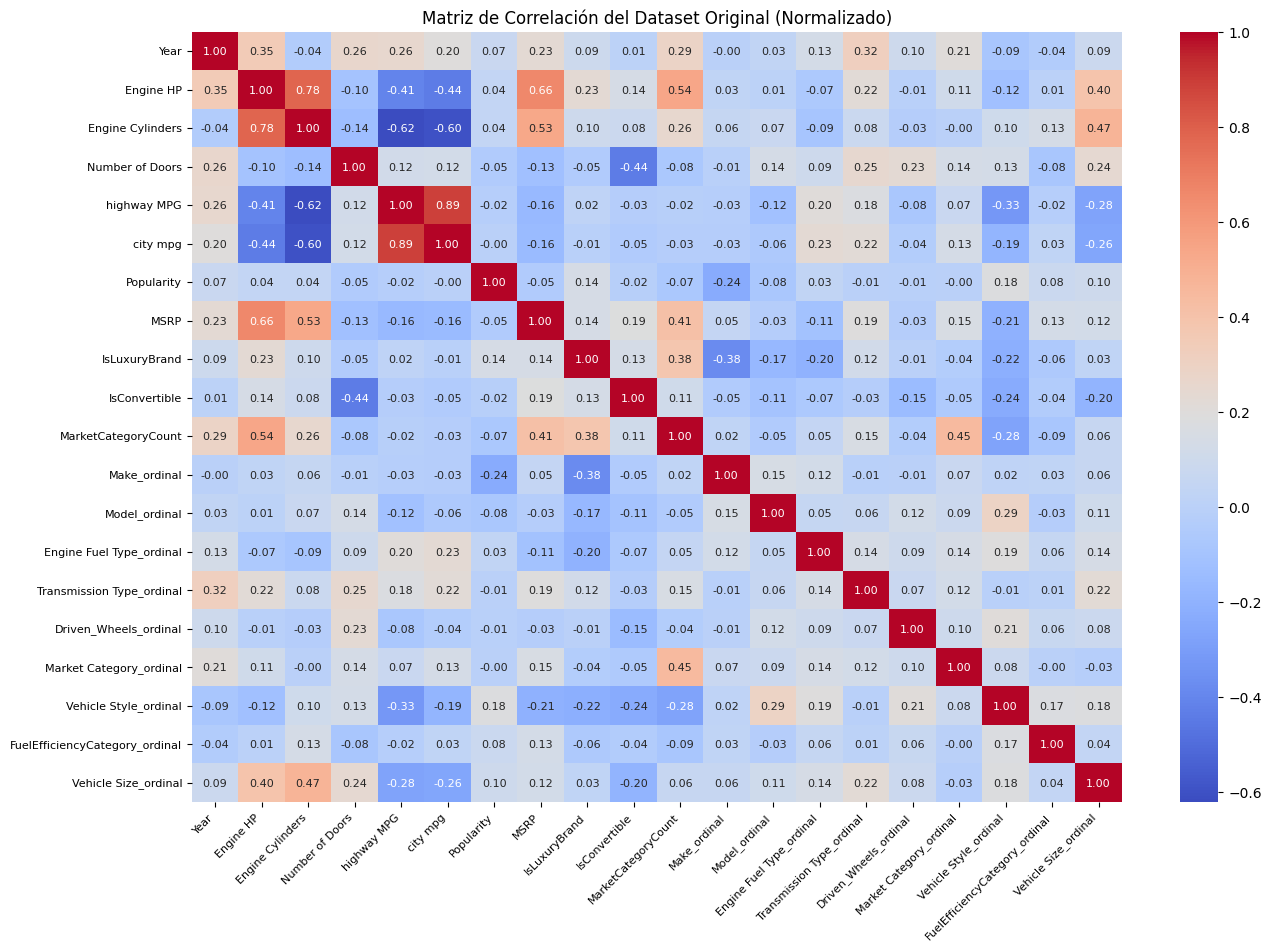

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calcular la matriz de correlación para el dataset original usando la mitad de las filas
corr_original = df_normalized.iloc[:len(df_normalized) // 2].corr()

# Crear la figura para la matriz de correlación del dataset original normalizado
plt.figure(figsize=(15, 10))
sns.heatmap(corr_original, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Matriz de Correlación del Dataset Original (Normalizado)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## **Matriz de correlacion del dataset sintético**

Las correlaciones moderadas de Vehicle Size_ordinal con Engine HP y Engine Cylinders se mantienen, lo que indica que estas características del motor siguen siendo importantes para predecir el tamaño del vehículo.

Las ediciones del dataset han reducido algunas correlaciones, como la de Vehicle Size_ordinal con MSRP, lo que podría haber afectado la precisión del modelo. Esta reducción sugiere que las modificaciones pueden haber introducido ruido o alterado las relaciones originales entre las variables.

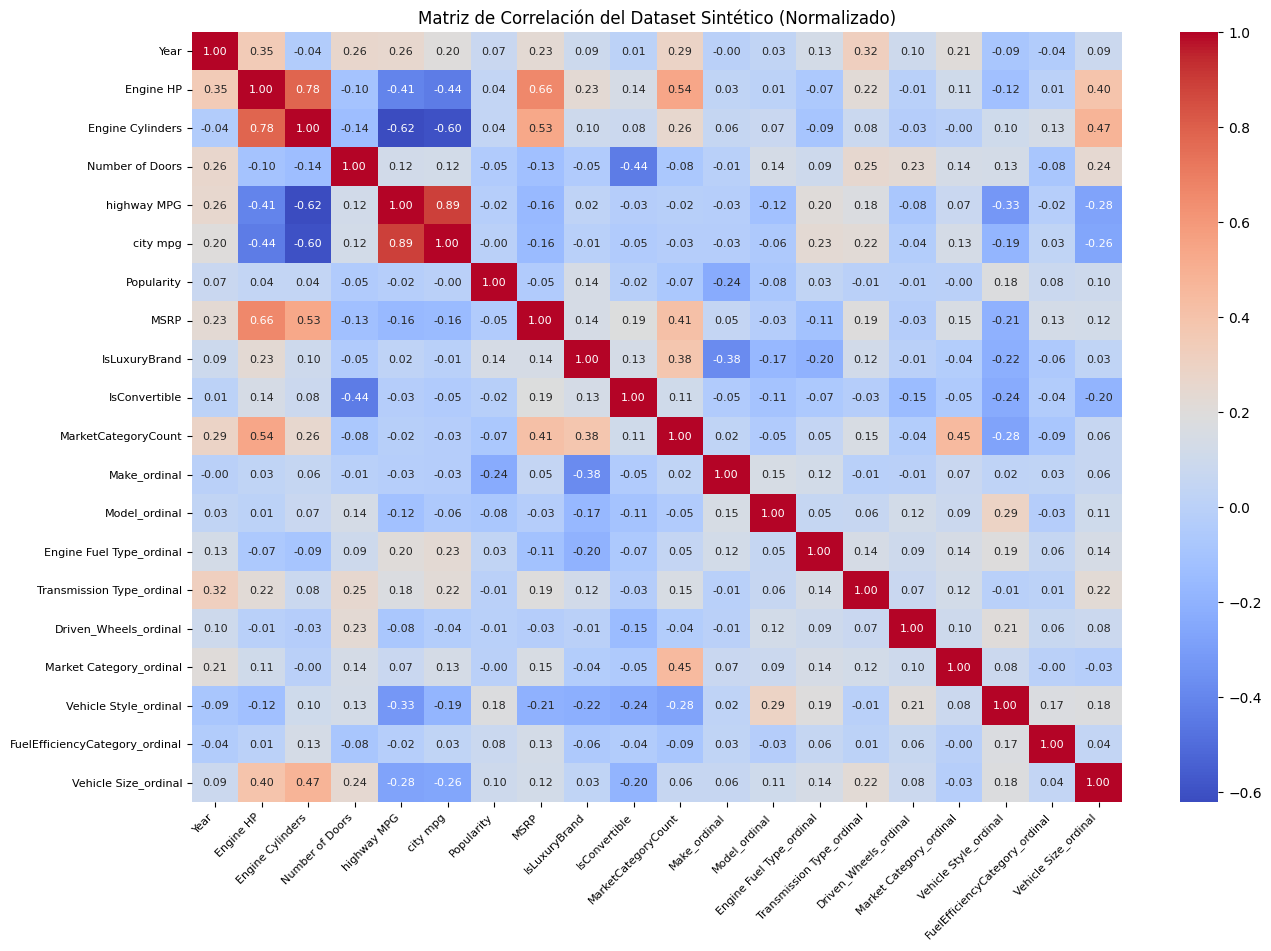

In [114]:
# Verificar la normalización y calcular las matrices de correlación nuevamente
corr_original = df_normalized.iloc[:len(df_normalized) // 2].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_original, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Matriz de Correlación del Dataset Sintético (Normalizado)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Utilizo la función train_test_split de la biblioteca scikit-learn para dividir el dataset normalizado (df_normalized) en conjuntos de entrenamiento y prueba.20% del dataset se utilizará como conjunto de prueba, mientras que el 80% restante se usará para entrenamiento.

In [115]:
from sklearn.model_selection import train_test_split

# Dividir el dataset normalizado en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(df_normalized, test_size=0.2, random_state=42)

# Verificar las primeras filas de cada conjunto para asegurarnos de que la división se realizó correctamente
print("Datos de Entrenamiento Normalizados:")
print(train_data.head())

print("\nDatos de Prueba Normalizados:")
print(test_data.head())


Datos de Entrenamiento Normalizados:
           Year  Engine HP  Engine Cylinders  Number of Doors  highway MPG  \
2312  -2.222824  -0.470391          1.331756         0.433265    -0.388254   
12887  0.936777   2.676841          0.208466         0.433265     0.423571   
13651 -1.169623  -0.863795          0.208466         0.433265    -0.504229   
18943  0.673477   0.085003          0.208466         0.433265     0.307596   
22021 -1.827874  -0.192694          0.208466         0.433265    -0.388254   

       city mpg  Popularity      MSRP  IsLuxuryBrand  IsConvertible  \
2312  -0.454710   -0.149434 -0.632748      -0.357929      -0.272227   
12887 -0.003597    0.151625  2.094945       2.793853       3.673407   
13651 -0.454710   -0.638831 -0.337714      -0.357929      -0.272227   
18943  0.109181    0.357466 -0.011574      -0.357929      -0.272227   
22021 -0.454710   -0.601024 -0.624520      -0.357929      -0.272227   

       MarketCategoryCount  Make_ordinal  Model_ordinal  \
2312    

Convierto los datos de entrenamiento y prueba de pandas DataFrame a arrays de NumPy

In [116]:
# Convertir a arrays de Numpy
X_train = train_data.drop(columns=['Vehicle Size_ordinal']).values.astype(np.float64)
y_train = train_data['Vehicle Size_ordinal'].values.astype(np.float64)

X_test = test_data.drop(columns=['Vehicle Size_ordinal']).values.astype(np.float64)
y_test = test_data['Vehicle Size_ordinal'].values.astype(np.float64)

# Verificar la conversión
print("\nArray de Numpy de Datos de Entrenamiento (X_train):")
print(X_train[:5])  # Mostrar las primeras 5 filas de características de entrenamiento

print("\nArray de Numpy de Etiquetas de Entrenamiento (y_train):")
print(y_train[:5])  # Mostrar las primeras 5 etiquetas de entrenamiento


Array de Numpy de Datos de Entrenamiento (X_train):
[[-2.22282374e+00 -4.70390827e-01  1.33175628e+00  4.33265412e-01
  -3.88254339e-01 -4.54709815e-01 -1.49434451e-01 -6.32747755e-01
  -3.57928580e-01 -2.72226863e-01 -1.63666909e+00  5.68526710e-01
  -1.06262366e+00 -3.92229218e-01  1.18797386e-01 -1.51683197e+00
  -7.03846244e-01 -7.85905812e-01 -8.49713101e-01]
 [ 9.36777220e-01  2.67684150e+00  2.08466480e-01  4.33265412e-01
   4.23570542e-01 -3.59708822e-03  1.51625013e-01  2.09494454e+00
   2.79385346e+00  3.67340677e+00  6.55138925e-01 -4.71671993e-01
  -1.44088863e+00  6.14453010e-01  2.30129863e+00  8.32027310e-01
  -8.48010876e-01 -1.07924171e+00  5.39634581e-01]
 [-1.16962342e+00 -8.63794868e-01  2.08466480e-01  4.33265412e-01
  -5.04229322e-01 -4.54709815e-01 -6.38831114e-01 -3.37714441e-01
  -3.57928580e-01 -2.72226863e-01 -4.90765083e-01 -1.16513780e+00
  -1.20354591e+00 -3.92229218e-01  1.18797386e-01 -3.42402329e-01
  -7.03846244e-01  1.85411726e+00 -8.49713101e-01]
 [

### **La función sigmoide**
Se utiliza para "comprimir" cualquier número real a un rango entre 0 y 1, haciendo que sea útil para modelar probabilidades. Dada su forma en "S" o curva logística, la función sigmoide toma valores reales y los transforma en una salida que puede interpretarse como una probabilidad.

In [117]:
# Función sigmoide
def sigmoid(z):
    #z = np.clip(z, -500, 500)
    #z = np.asarray(z, dtype=np.float64)
      # Convierte z a un array de Numpy de tipo flotante
    return 1 / (1 + np.exp(-z))

### **Función de costo**

***Costo (J):*** Una medida de qué tan bien el modelo actual (definido por theta) se ajusta a los datos. La función de costo ayuda a guiar el entrenamiento del modelo ajustando los valores de theta para minimizar este costo.

***Gradiente (grad):*** El gradiente del costo con respecto a cada parámetro en theta. Esto se utiliza para actualizar los parámetros durante el proceso de optimización (por ejemplo, utilizando el algoritmo de descenso de gradiente).

***Parámetros***

* `theta`: Un array numpy que contiene los parámetros actuales de la regresión logística. Es un vector de tamaño n, donde n es el número de características (incluyendo el término de intercepción o "bias").

* `X`: El conjunto de datos de entrada, una matriz m x n donde m es el número de ejemplos y n es el número de características (incluyendo la intercepción).

* `y`: Las etiquetas o valores de salida esperados. Es un vector de tamaño m, donde cada valor es la etiqueta correspondiente a un ejemplo en X.

* `lambda_`: Parámetro de regularización. Un escalar que controla la magnitud de la penalización por tener pesos grandes, ayudando a prevenir el sobreajuste.

**IMPLEMENTACION DE LA FUNCIÓN**

**1. Inicializacion de Variables Útiles**
* `m`: Número de ejemplos de entrenamiento. Se obtiene del tamaño de y.

**2. Inicializacion de la funcion de Costo y el Gradiente**

* Inicializa el costo J como 0 y el gradiente grad como un vector de ceros del mismo tamaño que theta. Esto es para asegurar que tengan los valores correctos antes de los cálculos.

**3. Calculo de la Hipotesis**

```
h = sigmoid(X.dot(theta.T))
```

* `X.dot(theta.T)`: Calcula el producto punto de la matriz de entrada X con el vector theta. Esto resulta en un vector de tamaño m, donde cada entrada representa el valor lineal predicho para un ejemplo.

* `sigmoid(...)`: Aplica la función sigmoide a cada valor del producto punto para obtener la probabilidad estimada de que la etiqueta sea 1 para cada ejemplo. h es, por lo tanto, un vector de tamaño m con valores entre 0 y 1.

**4. Regularizacion de los parametros**

* `temp`: Crea una copia de theta para usarla en la regularización.
* `temp[0] = 0`: Establece el primer elemento de temp (el término de intercepción o "bias") a 0. Esto se hace porque no se debe regularizar el término de intercepción en la regresión logística.

**5. Calculo del costo regularizado**
* *Primera Parte (`(1 / m) * np.sum(...)`)*
  * Calcula la funcion de costo de la regresion logistica sin regularizacion
  * `-y.dot(np.log(h))`: Calcula el costo cuando la etiqueta y es 1.
  * `(1 - y).dot(np.log(1 - h))`: Calcula el costo cuando la etiqueta y es 0.
  * La suma total representa el costo promedio de todas las predicciones

* *Segunda Parte ((lambda_ / (2 * m)) * np.sum(np.square(temp)))*:
  * Agrega la penalización de regularización al costo.
  * Regulariza todos los elementos de theta excepto el término de intercepción (theta[0]).

**6. Calculo del gradiente regularizado**
* `(1 / m) * (h - y).dot(X)`: Calcula el gradiente de la función de costo sin regularización. Esto es la derivada de la función de costo con respecto a cada parámetro en theta.

* `(lambda_ / m) * temp`: Agrega el término de regularización al gradiente. Recuerda que temp[0] = 0, por lo que el término de intercepción no se regulariza.

**7. Retorno del costo y el gradiente**

In [118]:
# Función de coste con regularización
def lrCostFunction(theta, X, y, lambda_):
    m = y.size
    if y.dtype == bool:
        y = y.astype(int)

    h = sigmoid(X.dot(theta.T))
    #h = np.clip(h, 1e-15, 1 - 1e-15)  # Asegura que los valores de h estén entre (0, 1)

    temp = theta
    temp[0] = 0  # No regularizar el término de sesgo (bias)

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X) + (lambda_ / m) * temp

    return J, grad

## Explicación de la Función de Descenso por Gradiente

### Inicialización de Parámetros

- `m = y.shape[0]`: Calcula el número de ejemplos de entrenamiento en el conjunto de datos (`m`). `y` es el vector de etiquetas (valores reales de salida), y su tamaño da el número de ejemplos en el conjunto de datos.
- `theta = theta.copy()`: Realiza una copia de los parámetros iniciales `theta` para evitar modificar el original mientras se ajustan los parámetros durante el proceso de aprendizaje.
- `J_history = []`: Inicia una lista vacía para almacenar el historial de costos a lo largo de las iteraciones del descenso por gradiente.

### Bucle de Iteración del Descenso por Gradiente

- `for i in range(num_iters)`: Ejecuta el bucle de actualización del gradiente por el número de iteraciones especificado (`num_iters`).

### Cálculo de la Hipótesis

- `h = sigmoid(np.dot(X, theta))`: Calcula la hipótesis `h` para la regresión logística. Utiliza la función sigmoide (`sigmoid`) para obtener la probabilidad de que un ejemplo pertenezca a una clase. `np.dot(X, theta)` realiza el producto punto entre el conjunto de características `X` y los parámetros actuales `theta`.

### Cálculo del Gradiente

- `gradient = (alpha / m) * np.dot((h - y), X)`: Calcula el gradiente, que representa la dirección y magnitud del ajuste necesario para minimizar el costo. Aquí:
  - `(h - y)` calcula el error entre las predicciones (`h`) y los valores reales (`y`).
  - `np.dot((h - y), X)` multiplica el error por las características `X` para determinar cuánto y en qué dirección se deben ajustar los parámetros.
  - `alpha / m` escala el gradiente por el tamaño del conjunto de datos y la tasa de aprendizaje `alpha`.

### Actualización de Parámetros

- `theta = theta - gradient`: Actualiza los parámetros `theta` restando el gradiente calculado. Esto ajusta los parámetros en la dirección que minimiza el costo.

### Cálculo del Costo con Regularización

- `J, _ = lrCostFunction(theta, X, y, lambda_)`: Calcula el costo actual del modelo con los parámetros ajustados usando una función de costo regularizada (`lrCostFunction`). Este costo se utiliza para evaluar la eficacia del ajuste en cada iteración.
- `J_history.append(J)`: Añade el costo calculado a la lista `J_history` para mantener un registro de cómo cambia el costo a lo largo de las iteraciones.

### Devolución de Resultados

- `return theta, J_history`: Devuelve los parámetros optimizados `theta` y el historial de costos `J_history` tras completar todas las iteraciones.


In [119]:
# Función de descenso por gradiente
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))  # Asegura que X.dot(theta) sea compatible con np.exp
        #h = np.clip(h, 1e-15, 1 - 1e-15)  # Evitar valores extremos para la función de coste

        gradient = (alpha / m) * np.dot((h - y), X)
        theta = theta - gradient

        J, _ = lrCostFunction(theta, X, y, lambda_)
        J_history.append(J)

    return theta, J_history

Cuento la cantidad de ejemplos en cada clase de la columna Vehicle Size_ordinal para los conjuntos de datos de entrenamiento y prueba. Pudiendo ver mejor la distribucion de mis datos.

Hay un cierto desbalance en las clases, especialmente la clase 3, que tiene menos ejemplos que las clases 1 y 2 en ambos conjuntos de datos.

En los datos de entrenamiento, la clase 3 tiene significativamente menos ejemplos (4444) en comparación con la clase 1 (7657) y la clase 2 (6961).

En los datos de prueba, la misma tendencia se observa con 1110 ejemplos para la clase 3, mientras que las clases 1 y 2 tienen 1871 y 1785 ejemplos, respectivamente.

In [120]:
# Contar la cantidad de ejemplos en cada clase para los datos de entrenamiento
train_class_counts = train_data['Vehicle Size_ordinal'].value_counts()
print("\nDistribución de clases en los datos de entrenamiento:")
print(train_class_counts)

# Contar la cantidad de ejemplos en cada clase para los datos de prueba
test_class_counts = test_data['Vehicle Size_ordinal'].value_counts()
print("\nDistribución de clases en los datos de prueba:")
print(test_class_counts)



Distribución de clases en los datos de entrenamiento:
Vehicle Size_ordinal
1    7657
2    6961
3    4444
Name: count, dtype: int64

Distribución de clases en los datos de prueba:
Vehicle Size_ordinal
1    1871
2    1785
3    1110
Name: count, dtype: int64


"""
### Explicación del Código para Entrenamiento de un Modelo de Regresión Logística One-vs-All

#### Parámetros de Entrenamiento
- **alpha**: 0.00001 - La tasa de aprendizaje que determina el tamaño del paso que el algoritmo de descenso por gradiente toma en cada iteración.
  - Un valor pequeño como `0.00001` asegura pasos pequeños, evitando saltos sobre el mínimo global, pero puede ralentizar el entrenamiento.
- **num_iters**: 30000 - Número de iteraciones para el descenso por gradiente.
  - Un valor alto como `30000` sugiere que el modelo se entrenará durante mucho tiempo, asegurando la convergencia.
- **lambda_**: 0.01 - Parámetro de regularización que controla la cantidad de penalización en los coeficientes del modelo para evitar el sobreajuste.

#### Preprocesamiento de Datos
```python
# Aseguramos que todas las columnas sean numéricas
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce').fillna(0).values.astype(np.float64)
y_train = pd.to_numeric(y_train, errors='coerce').astype(np.float64)
```

* **classes**: Obtiene todas las clases únicas en el conjunto de datos y_train para entrenar un modelo de regresión logística para cada clase.
* **models**: Un diccionario para almacenar los parámetros de cada modelo entrenado.
* **cost_histories**: Un diccionario para almacenar el historial de costos de cada modelo.

Se usa un bucle for sobre las clases para entrenar el modelo de regresion logistica separado para cada clase.

* **y_binary**: Vector binario para la clase actual **c**:
*(y_train == c).astype(int)* marca con 1 si la clase de un ejemplo es igual a c y 0 en caso contrario, permitiendo usar regresión logística binaria.

* ``theta = np.zeros(X_train.shape[1], dtype=np.float64)`` inicializa los parámetros theta como un vector de ceros del tamaño del número de características en X_train.

* ``theta, cost_history = descensoGradiente(theta, X_train, y_binary, alpha, num_iters, lambda_)`` ajusta los parámetros theta usando el descenso por gradiente para minimizar el costo de la regresión logística binaria.

* ``models[c] = theta`` guarda los parámetros ajustados del modelo entrenado para la clase c.

* ``cost_histories[c] = cost_history`` guarda el historial de costos del entrenamiento.

* ``print(f"Coste final para la clase {c}: {cost_history[-1]}")`` imprime el costo final después de todas las iteraciones para la clase c.


In [121]:
# Parámetros de entrenamiento
alpha = 0.00001  # Tasa de aprendizaje
num_iters = 30000  # Número de iteraciones
lambda_ = 0.01  # Parámetro de regularización

# Asegurar que todas las columnas sean numéricas
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce').fillna(0).values.astype(np.float64)
y_train = pd.to_numeric(y_train, errors='coerce').astype(np.float64)

# Obtener las clases únicas del dataset
classes = np.unique(y_train)
models = {}  # Diccionario para almacenar los modelos entrenados
cost_histories = {}
# Entrenar un modelo de regresión logística para cada clase (One-vs-All)
# Entrenamiento del modelo con la nueva función sigmoide
for c in classes:
    print(f"Entrenando modelo para la clase: {c}")
    y_binary = (y_train == c).astype(int)  # Crear etiquetas binarias
    theta = np.zeros(X_train.shape[1], dtype=np.float64)  # Inicializar theta como array de Numpy con tipo flotante
    theta, cost_history = descensoGradiente(theta, X_train, y_binary, alpha, num_iters, lambda_)
    models[c] = theta  # Guardar el modelo entrenado
    cost_histories[c] = cost_history  # Guardar el historial de costos para la clase
    print(f"Coste final para la clase {c}: {cost_history[-1]}")


Entrenando modelo para la clase: 1.0
Coste final para la clase 1.0: 0.6641133968730629
Entrenando modelo para la clase: 2.0
Coste final para la clase 2.0: 0.6883602941978039
Entrenando modelo para la clase: 3.0
Coste final para la clase 3.0: 0.6660660249984902


### **Grafica de costo**
Los costos para las clases 1.0 y 3.0 disminuyen de manera consistente, el modelo aprende correctamente para estas clases. Sin embargo, para la clase 2 que es mas plana, tiene dificultlades para ajustar bien sus datos.

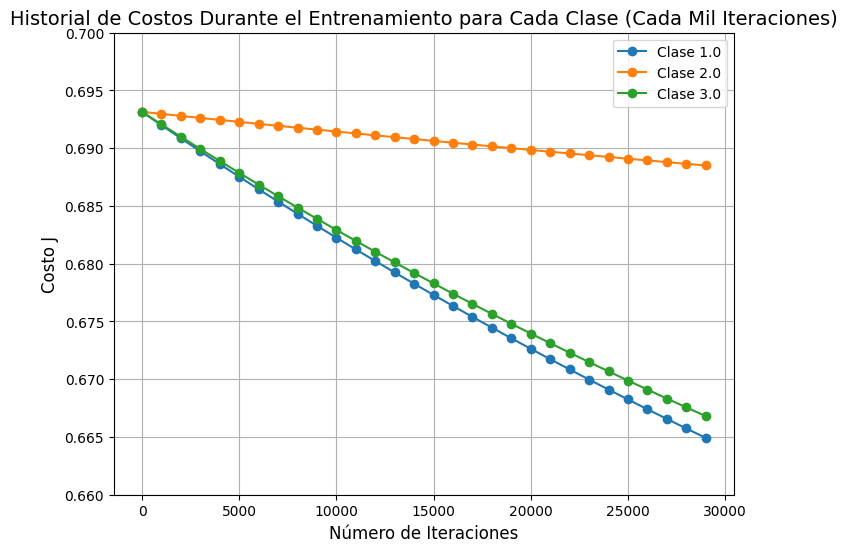

In [122]:
# Graficar los costos para cada clase cada mil iteraciones
plt.figure(figsize=(8, 6))

for c in classes:
    # Seleccionar puntos cada 1000 iteraciones
    iteraciones = range(0, num_iters, 1000)
    costos = [cost_histories[c][i] for i in iteraciones]
    plt.plot(iteraciones, costos, linestyle='-', marker='o', label=f'Clase {c}')  # Usar marcadores para cada punto

plt.xlabel('Número de Iteraciones', fontsize=12)
plt.ylabel('Costo J', fontsize=12)
plt.title('Historial de Costos Durante el Entrenamiento para Cada Clase (Cada Mil Iteraciones)', fontsize=14)
plt.legend()
plt.grid(True)
plt.ylim(0.66, 0.7)  # Ajustar el límite del eje Y para una mejor visualización
plt.show()

#### 1. **Función `clasificar_binario(modelo, X)`**

Esta función utiliza el modelo entrenado para realizar predicciones binarias sobre un conjunto de datos `X`.

- **Parámetros:**
  - `modelo`: Los parámetros (`theta`) del modelo entrenado.
  - `X`: El conjunto de características de entrada para las predicciones.

- **Proceso:**
  1. Calcula la probabilidad de que cada ejemplo pertenezca a la clase utilizando la función sigmoide:
     ```python
     probabilidades = sigmoid(np.dot(X, modelo))
     ```
  2. Convierte estas probabilidades en una clasificación binaria:
     - Si la probabilidad es mayor o igual a 0.5, la clase es 1; de lo contrario, es 0.
     ```python
     return (probabilidades >= 0.5).astype(int)
     ```

#### 2. **Función `calcular_precision(y_true, y_pred)`**

Calcula la precisión del modelo comparando las predicciones del modelo (`y_pred`) con las etiquetas verdaderas (`y_true`).

- **Parámetros:**
  - `y_true`: Etiquetas verdaderas del conjunto de datos.
  - `y_pred`: Predicciones realizadas por el modelo.

- **Proceso:**
  - Calcula la precisión dividiendo el número de predicciones correctas por el número total de ejemplos:
    ```python
    precision = np.mean(y_pred == y_true) * 100
    ```

#### 3. **Bucle para Evaluación de Modelos**

Este bucle realiza predicciones y calcula métricas para cada modelo entrenado en un enfoque "One-vs-All" (Uno contra todos).

- **Proceso:**
  - Para cada clase `c` en `models.items()`:
    - Se imprimen los resultados del modelo para la clase `c`.
    - Se convierten las etiquetas del conjunto de entrenamiento (`y_train`) y del conjunto de prueba (`y_test`) en binarias, indicando si pertenecen a la clase `c` o no.
    - **Predicciones en el Conjunto de Entrenamiento:**
      - Se obtienen las predicciones binarias del modelo utilizando la función `clasificar_binario`.
      - Se


In [123]:
# Función para realizar la clasificación binaria utilizando un modelo específico
def clasificar_binario(modelo, X):
    # Calcular la probabilidad de que cada ejemplo pertenezca a la clase del modelo
    probabilidades = sigmoid(np.dot(X, modelo))
    # Clasificar como 1 si la probabilidad es mayor o igual a 0.5, de lo contrario 0
    return (probabilidades >= 0.5).astype(int)

# Nueva función para calcular la precisión directamente
def calcular_precision(y_true, y_pred):
    # Calcular la precisión del modelo en clasificación multiclase
    precision = np.mean(y_pred == y_true) * 100
    return precision

# Realizar predicciones para cada modelo en el diccionario y calcular métricas para ambos conjuntos
for c, modelo in models.items():
    print(f"\nResultados para la clase {c}:")

    # Predicciones en el conjunto de entrenamiento
    y_train_binaria = (y_train == c).astype(int)
    y_pred_train_binaria = clasificar_binario(modelo, X_train)
    precision_train = calcular_precision(y_train_binaria, y_pred_train_binaria)

    # Predicciones en el conjunto de prueba
    y_test_binaria = (y_test == c).astype(int)
    y_pred_test_binaria = clasificar_binario(modelo, X_test)
    precision_test = calcular_precision(y_test_binaria, y_pred_test_binaria)

    # Imprimir los resultados de las métricas para el conjunto de entrenamiento
    print(f"\nConjunto de Entrenamiento:")
    print(f"Precisión: {precision_train:.2f}%")

    # Imprimir los resultados de las métricas para el conjunto de prueba
    print(f"\nConjunto de Prueba:")
    print(f"Precisión: {precision_test:.2f}%")



Resultados para la clase 1.0:

Conjunto de Entrenamiento:
Precisión: 71.95%

Conjunto de Prueba:
Precisión: 70.50%

Resultados para la clase 2.0:

Conjunto de Entrenamiento:
Precisión: 60.26%

Conjunto de Prueba:
Precisión: 62.63%

Resultados para la clase 3.0:

Conjunto de Entrenamiento:
Precisión: 69.94%

Conjunto de Prueba:
Precisión: 70.23%


### **Función `softmax**`

La función `softmax` se utiliza en problemas de clasificación multiclase. Transforma un vector de valores en un vector de probabilidades, donde cada valor representa la probabilidad de que una muestra pertenezca a una clase específica. El rango de salida de `softmax` es de 0 a 1, y la suma de todas las probabilidades es 1.

```z -= np.max(z, axis=1, keepdims=True ```
Esta línea resta el valor máximo de cada fila en la matriz z.

```exp_z = np.exp(z)```
Calcula la exponencial de cada valor en la matriz z. Transformar los valores de z para que todos sean positivos

```return exp_z / np.sum(exp_z, axis=1, keepdims=True)```
Divide cada exponencial por la suma de todas las exponenciales en la misma fila, normaliza las probabilidades, de modo que la suma de las probabilidades en cada fila sea igual a 1.

In [124]:
def softmax(z):
    # Restar el máximo de z para evitar desbordamiento numérico
    z -= np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

### **Calcular Puntajes**
Se crea una matriz de ceros con dimensiones (n_samples, n_classes), donde n_samples es el número de ejemplos en X, y n_classes es el número de modelos binarios entrenados (una por clase). Esta matriz almacenará los puntajes calculados para cada ejemplo en X y cada modelo binario.

Se itera sobre los modelos binarios almacenados en el diccionario models. Para cada modelo binario, se calcula el puntaje lineal z mediante la multiplicación de X (características de entrada) por theta (pesos del modelo).

El puntaje z es una medida de cuán fuerte es la evidencia de que una muestra pertenece a una clase específica. Estos puntajes se utilizan en la función softmax para calcular las probabilidades de cada clase.

La función devuelve la matriz de puntajes calculados para cada ejemplo en X y para cada modelo binario, son la base para calcular las probabilidades de clase usando la función softmax.

In [125]:
# Función para calcular los puntajes de cada modelo binario
def calcular_puntajes(models, X):
    # Inicializar una matriz para almacenar los puntajes
    puntajes = np.zeros((X.shape[0], len(models)))

    # Calcular los puntajes para cada modelo binario
    for i, (c, theta) in enumerate(models.items()):
        puntajes[:, i] = X.dot(theta)  # Calcular el puntaje lineal (z) para cada clase

    return puntajes

### **Calcular las Predicciones Finales Utilizando Softmax**

1. Calculo los puntajes para el conjunto de prueba pasandole el modelo y los datos de prueba

2. Aplico softmax a los puntajes para objtener probabilidades. Cada fila de la matriz resultante contiene las probabilidades de pertenencia de una muestra a cada una de las clases.

3. Seleccionar la Clase con la Mayor Probabilidad. ``np.argmax(probabilidades_test, axis=1)`` selecciona el índice de la clase con la mayor probabilidad para cada muestra. La suma de +1 ajusta los índices para que coincidan con las etiquetas de clase originales (asumiendo que empiezan en 1).

5. Imprimo las predicciones finales del modelo y calculo la precision del modelo. Comparo las predicciones finales y_pred_final con las etiquetas reales y_test y calculo la precisión del modelo como el porcentaje de predicciones correctas.

In [126]:
# Calcular los puntajes para el conjunto de prueba
puntajes_test = calcular_puntajes(models, X_test)

# Aplicar softmax a los puntajes para obtener probabilidades
probabilidades_test = softmax(puntajes_test)

# Predicción final: seleccionar la clase con la mayor probabilidad
y_pred_final = np.argmax(probabilidades_test, axis=1) + 1  # +1 para ajustar las clases al rango [1, 2, 3, ...]

# Imprimir las predicciones finales
print(f"Predicciones finales para el conjunto de prueba: {y_pred_final}")

# Calcular la precisión del modelo
precision = np.mean(y_pred_final == y_test) * 100
print(f"Precisión del modelo con Softmax en el conjunto de prueba: {precision:.2f}%")

Predicciones finales para el conjunto de prueba: [1 3 2 ... 1 3 2]
Precisión del modelo con Softmax en el conjunto de prueba: 55.46%


### **Matriz de confusion**

La mayor cantidad de aciertos se encuentra en la clase Compact, seguida de la clase Large.

La clase Midsize tiene un número considerable de errores, especialmente clasificándose como Compact y Large.

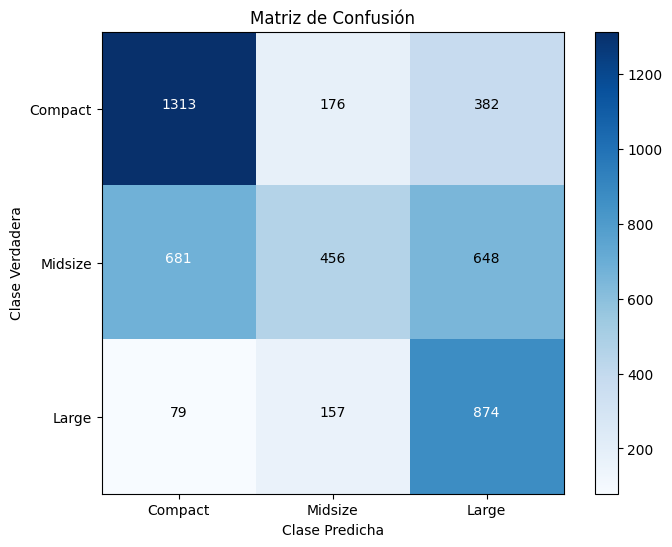

In [127]:
# Función para calcular la matriz de confusión
def calcular_matriz_confusion(y_true, y_pred, num_classes):
    matriz_confusion = np.zeros((num_classes, num_classes), dtype=int)

    for i in range(len(y_true)):
        matriz_confusion[int(y_true[i]) - 1, int(y_pred[i]) - 1] += 1

    return matriz_confusion

# Determinar el mapeo de clases (reemplaza con tu mapeo real)
mapeo_clases = {1: 'Compact', 2: 'Midsize', 3: 'Large'}  # Ejemplo de mapeo

# Calcular la matriz de confusión usando el código anterior
num_classes = len(mapeo_clases)
matriz_confusion = calcular_matriz_confusion(y_test, y_pred_final, num_classes)

# Graficar la matriz de confusión con nombres de clases
plt.figure(figsize=(8, 6))
plt.imshow(matriz_confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, [mapeo_clases[i + 1] for i in range(num_classes)])
plt.yticks(tick_marks, [mapeo_clases[i + 1] for i in range(num_classes)])

plt.ylabel('Clase Verdadera')
plt.xlabel('Clase Predicha')

# Mostrar los valores en la matriz de confusión
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, str(matriz_confusion[i, j]), horizontalalignment="center", color="white" if matriz_confusion[i, j] > matriz_confusion.max() / 2 else "black")

plt.show()


In [128]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))  # Inicializar matriz de parámetros
    X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Agregar la columna de unos para el término de intercepción

    # Lista para almacenar los costos de cada clasificador
    all_cost_history = []

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)  # Inicializar los parámetros theta
        options = {'maxiter': 100}  # Configurar las opciones del optimizador

        # Lista temporal para almacenar los costos de este clasificador
        cost_history = []

        # Callback para registrar el costo en cada iteración
        def callbackF(theta):
            cost, _ = lrCostFunction(theta, X, (y == c), lambda_)
            cost_history.append(cost)

        # Ejecutar la minimización utilizando el optimizador de Conjugate Gradient
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                options=options,
                                callback=callbackF)

        # Guardar los parámetros optimizados y el historial de costos
        all_theta[c] = res.x
        all_cost_history.append(cost_history)

        # Imprimir solo el costo final después de la optimización
        print(f'Costo final para la clase {c}: {cost_history[-1]}')

    return all_theta, all_cost_history

In [129]:
# Parámetros para entrenamiento
num_labels = len(np.unique(y_train))  # Número de etiquetas/clases en tu dataset
lambda_ = 0.01  # Regularización

# Llamar a la función para entrenar con One-vs-All
all_theta, all_cost_history = oneVsAll(X_train, y_train, num_labels, lambda_)

Costo final para la clase 0: 6.6972231769324675e-06
Costo final para la clase 1: 0.5052071692414882
Costo final para la clase 2: 0.6134904326769429


In [130]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

In [131]:
# Realizar predicciones en los datos de entrenamiento y prueba
y_pred_train = predictOneVsAll(all_theta, X_train)
y_pred_test = predictOneVsAll(all_theta, X_test)

In [132]:
# Función para calcular la precisión
def calcular_precision(y_true, y_pred):
    """
    Calcula la precisión del modelo.

    Parámetros:
    y_true : ndarray
        Vector de etiquetas verdaderas.
    y_pred : ndarray
        Vector de etiquetas predichas por el modelo.

    Retorna:
    precision : float
        Precisión del modelo en porcentaje.
    """
    precision = np.mean(y_true == y_pred) * 100  # Calcula la precisión como el porcentaje de predicciones correctas
    return precision

In [133]:
# Calcular la precisión para el conjunto de entrenamiento y prueba
precision_train = calcular_precision(y_train, y_pred_train)
precision_test = calcular_precision(y_test, y_pred_test)

print(f"Precisión del modelo en el conjunto de entrenamiento: {precision_train:.2f}%")
print(f"Precisión del modelo en el conjunto de prueba: {precision_test:.2f}%")

Precisión del modelo en el conjunto de entrenamiento: 55.82%
Precisión del modelo en el conjunto de prueba: 55.10%


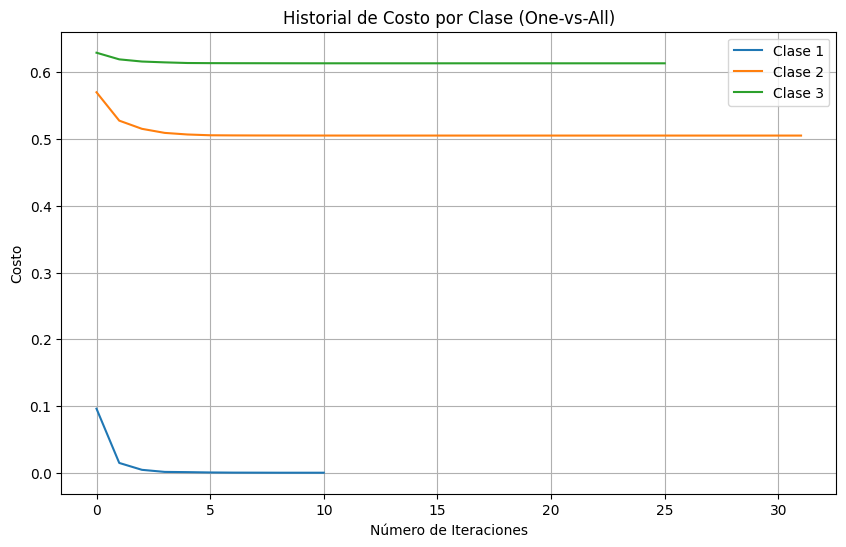

In [134]:
def graficar_costo(all_cost_history, num_labels):
    """
    Grafica el costo de entrenamiento para cada clase en el modelo One-vs-All.

    Parámetros:
    all_cost_history : list
        Lista de listas, donde cada sublista contiene el historial de costos para un clasificador.
    num_labels : int
        Número de etiquetas o clases en el dataset.
    """
    plt.figure(figsize=(10, 6))

    # Graficar el costo para cada clase
    for c in range(num_labels):
        iteraciones = range(len(all_cost_history[c]))  # Obtener la cantidad de iteraciones para la clase c
        plt.plot(iteraciones, all_cost_history[c], label=f'Clase {c+1}')

    plt.xlabel('Número de Iteraciones')
    plt.ylabel('Costo')
    plt.title('Historial de Costo por Clase (One-vs-All)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Llamar a la función para graficar el costo
graficar_costo(all_cost_history, num_labels)

## **Explicación de los Resultados**
La precision de 55% de los modelos puede estar influenciado por razones relacionados con la calidad del dataset.

1. Observando las matrices de correlación,se puede notar que muchas de las características no están fuertemente correlacionadas entre sí o con la variable objetivo (Vehicle Size_ordinal). La correlación más alta parece ser alrededor de 0.66, pero la mayoría de los valores están más cerca de 0 o valores bajos (positivos o negativos).

2. Los datos sintéticos pueden introducir ruido en el modelo, especialmente si las modificaciones no reflejan patrones reales en los datos. Este ruido puede hacer que el modelo aprenda patrones erróneos o irrelevantes, lo que también puede afectar la precisión.

3. Si el dataset original contiene mucha variabilidad (diferencias significativas entre instancias) y estas no se relacionan claramente con la variable objetivo, el modelo puede tener dificultades para encontrar patrones significativos.

